# Function used

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import f

def calculate_anova_parameters(y, y_pred, num_features):
    n = len(y)
    p = num_features  # Number of features in the model

    # Calculate sum of squares
    y_mean = np.mean(y)
    sum_sq_total = np.sum((y - y_mean) ** 2)
    sum_sq_model = np.sum((y_pred - y_mean) ** 2)
    sum_sq_res = np.sum((y - y_pred) ** 2)

    return p, n, sum_sq_model, sum_sq_res, sum_sq_total

def create_anova_table(y, y_pred, num_features):
    p, n, sum_sq_model, sum_sq_res, sum_sq_total = calculate_anova_parameters(y, y_pred, num_features)

    df_model = p
    df_residual = n - p - 1
    df_total = n - 1

    mean_sq_model = sum_sq_model / df_model
    mean_sq_res = sum_sq_res / df_residual

    f_value = mean_sq_model / mean_sq_res
    p_value_model = 1 - f.cdf(f_value, df_model, df_residual)
    r_squared_model = sum_sq_model / sum_sq_total

    # Create data for the table
    header = ["Source", "df", "sum_sq", "mean_sq", "F", "PR(>F)"]
    cells = [
        ["Model", df_model, sum_sq_model, mean_sq_model, f_value, p_value_model],
        ["Residual", df_residual, sum_sq_res, mean_sq_res, None, None],
        ["Total", df_total, sum_sq_total, None, None, None]
    ]
    # Create the table
    table = go.Figure(data=[go.Table(header=dict(values=header),
                                     cells=dict(values=list(zip(*cells))))])
    table.update_layout(title="ANOVA Table")
    return table

# # Example usage
# # Sample data
# y = np.array([10, 12, 14, 16, 18])
# y_pred = np.array([9, 11, 14, 15, 19])  # Example predicted values
# num_features = 2  # Assuming 2 features in the model

# # Create ANOVA table using Plotly
# anova_table = create_anova_table(y, y_pred, num_features)
# # Display the table
# anova_table.show()


hypothesis of coefficients

In [ ]:
from scipy.stats import t

def hypothesis_testing_regression(x, y, num_predictors,coef, res_square):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis: βi = 0 (No effect on dependent variable) for all i")
    print("Alternative Hypothesis: At least one βi ≠ 0")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals =", sum_of_residual_sq)

    df_residual = n - num_predictors - 1
    Mse = sum_of_residual_sq / df_residual
    print("Mean Squared Error (MSE) =", Mse)
    print("Root Mean Squared Error (RMSE) =", np.sqrt(Mse))

    # Step 4: Calculate test statistics for each coefficient
    print("4. Step 4")
    for i in range(num_predictors):
        Sbi = np.sqrt(Mse) / np.sqrt(np.sum((x[:, i] - np.mean(x[:, i]))**2))
        t_statistic = coef / Sbi
        print(f"t-statistic for coefficient {i+1}: {t_statistic}")

        # Step 5: Construct Acceptance / Rejection regions
        # Degrees of freedom
        df = df_residual

        # Calculate p-value
        p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
        print(f"p-value for coefficient {i+1}:", p_value)

        # Step 6: Based on steps 5 and 6, draw a conclusion about H0
        if p_value < alpha:
            print(f"Reject the Null Hypothesis for coefficient {i+1}")
        else:
            print(f"Fail to reject Null Hypothesis for coefficient {i+1}")

# Example usage
# x = Independent variables (matrix where each column represents a different variable)
# y = Dependent variable
# num_predictors = Number of predictors
# res_square = Array of squared residuals

#hypothesis_testing_regression(x, y, num_predictors,c res_square)
# def hypothesis_testing_regression(data['ConstArea'], data['SalePrice'], 4, 62.5696 , results['Res_Sqr']):



In [ ]:
def omnibus_test_regression(x, y, res_square, k):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)")
    print("Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    Sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals =", Sum_of_residual_sq)

    mean = np.mean(x)
    Mse = Sum_of_residual_sq / (n - k - 1)
    print("Mean Squared Error (MSE) =", Mse)
    print("Root Mean Squared Error (RMSE) =", np.sqrt(Mse))

    s = (x - mean) ** 2
    a = s.sum()
    b = np.sqrt(a)

    # Step 4: Calculate the F-statistic
    print("4. Step 4")
    SSR = np.sum((y - np.mean(y)) ** 2) - Sum_of_residual_sq
    MSR = SSR / k
    F_statistic = MSR / Mse
    print("The value of F-statistic =", F_statistic)

    # Step 5: Construct Acceptance / Rejection regions
    print("5. Step 5")
    # Degrees of freedom
    df1 = k
    df2 = n - k - 1

    # Calculate p-value
    p_value = 1 - f.cdf(F_statistic, df1, df2)
    print("p-value:", p_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    print("6. Step 6")
    if p_value < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis")

# # Example usage
# x = np.array([20, 22, 24, 26, 28])  # Independent variable
# y = np.array([10, 12, 14, 16, 18])   # Dependent variable
# res_square = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
# k = 1  # Number of independent variables

# omnibus_test_regression(x, y, res_square, k)


# Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import t,f,normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ass_03/solution/20vardata.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['Zoning', 'LotArea', 'LotShape', 'LandContour', 'Neighborhood',
       'BldgType', 'YearRemodel', 'ExterCond', 'Foundation', 'CentralAir',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'TotalFullBath',
       'TotalHalfBath', 'SaleCondition', 'HouseAge', 'ConstArea', 'QIndex',
       'Price_sqft', 'log(SalePrice)', 'SalePrice'],
      dtype='object')

In [ ]:
data = df.select_dtypes(include=['int','float','bool'])

In [ ]:
data = data.astype(float)

In [ ]:
data.dtypes

LotArea           float64
YearRemodel       float64
TotRmsAbvGrd      float64
Fireplaces        float64
GarageCars        float64
TotalFullBath     float64
TotalHalfBath     float64
HouseAge          float64
ConstArea         float64
QIndex            float64
Price_sqft        float64
log(SalePrice)    float64
SalePrice         float64
dtype: object

 # **Model 3**

In [ ]:
data.corr()

,LotArea,YearRemodel,TotRmsAbvGrd,Fireplaces,GarageCars,TotalFullBath,TotalHalfBath,HouseAge,ConstArea,QIndex,Price_sqft,log(SalePrice),SalePrice
LotArea,1.000000,0.044593,0.398022,0.304926,0.315229,0.196598,0.027033,-0.055794,0.439405,0.130673,0.147886,0.402900,0.386135
YearRemodel,0.044593,1.000000,0.226496,0.093722,0.456093,0.462743,0.140128,-0.631999,0.364426,0.427813,0.555968,0.583612,0.536568
TotRmsAbvGrd,0.398022,0.226496,1.000000,0.348623,0.455027,0.362092,0.320321,-0.221717,0.692364,0.292215,0.165114,0.588244,0.581919
Fireplaces,0.304926,0.093722,0.348623,1.000000,0.309523,0.271576,0.168309,-0.144305,0.455020,0.253440,0.226706,0.460149,0.441200
GarageCars,0.315229,0.456093,0.455027,0.309523,1.000000,0.506998,0.143869,-0.564555,0.624792,0.339627,0.500355,0.730406,0.698357
TotalFullBath,0.196598,0.462743,0.362092,0.271576,0.506998,1.000000,-0.023658,-0.531283,0.568080,0.270127,0.424061,0.652016,0.615873
TotalHalfBath,0.027033,0.140128,0.320321,0.168309,0.143869,-0.023658,1.000000,-0.196368,0.145426,0.121935,0.174051,0.212998,0.192067
HouseAge,-0.055794,-0.631999,-0.221717,-0.144305,-0.564555,-0.531283,-0.196368,1.000000,-0.432555,-0.152578,-0.559809,-0.639951,-0.587807
ConstArea,0.439405,0.364426,0.692364,0.455020,0.624792,0.568080,0.145426,-0.432555,1.000000,0.394340,0.239206,0.847248,0.848029
QIndex,0.130673,0.427813,0.292215,0.253440,0.339627,0.270127,0.121935,-0.152578,0.394340,1.000000,0.488512,0.559391,0.537010


In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data[['ConstArea','LotArea','HouseAge','QIndex']]  # Add all your predictor variables here
y = data['SalePrice']

# Fit the multiple linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Get the summary of the regression model
print(model.summary())



# Print the regression equation
print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea + {:.4f}*LotArea+ {:.4f}*HouseAge + {:.4f}*QIndex".format(model.params['const'], model.params['ConstArea'], model.params['LotArea'], model.params['HouseAge'], model.params['QIndex']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2562.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:23:04   Log-Likelihood:                -23868.
No. Observations:                2030   AIC:                         4.775e+04
Df Residuals:                    2025   BIC:                         4.777e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.878e+04   3984.602    -12.242      0.0

In [ ]:
# Coefficients from the provided regression equation
b0 = -48777.5733
b1 = 62.5696
b2 = 1.6739
b3 = -783.1308
b4 = 2419.8918

# Extract the required features from the dataset
ConstArea = data['ConstArea']
LotArea = data['LotArea']
HouseAge = data['HouseAge']
QIndex = data['QIndex']

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1 * ConstArea + b2 * LotArea + b3 * HouseAge + b4 * QIndex

# Extract the actual values
actual_values = data['SalePrice']

# Calculate the residuals
residuals = actual_values - predicted_values
res_square = residuals**2
sum_res_square1= np.sum(res_square)

# Create a DataFrame to hold actual, predicted, and residual values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals,'Res_Sqr':res_square})

# Print the actual, predicted, and residual values
print(results)


        Actual    Predicted    Residual       Res_Sqr
0     215000.0  209032.8693   5967.1307  3.560665e+07
1     172000.0  187807.2580 -15807.2580  2.498694e+08
2     244000.0  285751.5821 -41751.5821  1.743195e+09
3     189900.0  184679.5255   5220.4745  2.725335e+07
4     195500.0  203944.2241  -8444.2241  7.130492e+07
...        ...          ...         ...           ...
2025  131000.0  186543.0037 -55543.0037  3.085025e+09
2026  142500.0  159910.0158 -17410.0158  3.031087e+08
2027  132000.0  135989.0676  -3989.0676  1.591266e+07
2028  170000.0  177233.6239  -7233.6239  5.232531e+07
2029  188000.0  229311.0962 -41311.0962  1.706607e+09

[2030 rows x 4 columns]


In [ ]:
import numpy as np

# Step 1: Fit the multiple regression model and obtain residuals
# Assume you have already fitted the model and obtained residuals
#residuals = np.array([...])  # Array of residuals

# Step 2: Calculate the Residual Sum of Squares (RSS)
RSS = np.sum(results['Res_Sqr'])

# Step 3: Determine the degrees of freedom (DF)
n = 2030  # Total number of observations
p = 4  # Number of predictors (including intercept)
DF = n - p - 1  # Degrees of freedom

# Step 4: Compute the Mean Squared Error (MSE)
MSE = RSS / DF

# Step 5: Calculate the variance-covariance matrix of the coefficient estimates
# Assuming you have already obtained the coefficient estimates and the design matrix X
# coef = np.array([...])  # Coefficient estimates
# X = np.array([...])  # Design matrix
# Compute the inverse of the product of X'X
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Calculate the variance-covariance matrix
var_cov_matrix = MSE * XtX_inv

# Step 6: Extract the standard errors from the variance-covariance matrix
# The standard errors are the square roots of the diagonal elements of the variance-covariance matrix
std_errors = np.sqrt(np.diag(var_cov_matrix))

# Print the standard errors for each coefficient
print("Standard Errors:")
for i, std_err in enumerate(std_errors):
    print(f"Coefficient {i+1}: {std_err}")


Standard Errors:
Coefficient 1: 1.1759369495975434
Coefficient 2: 0.2155543200942961
Coefficient 3: 24.244528246542355
Coefficient 4: 79.18190991561104


In [ ]:
anova_table = create_anova_table(actual_values, predicted_values, 4)
anova_table.show()

## Hypothesis testing for coefficients of Model3

In [ ]:
from scipy.stats import t


def hypothesis_testing_regression1(coef,x,p):
    n = len(x)
    summary = model.summary()
# Extract coefficients and standard errors from the summary table
    coef_data = summary.tables[1].data  # Extract table data for coefficients and standard errors

# Coefficients are typically in the first column and standard errors in the second column
    coefficients = [float(row[1]) for row in coef_data[1:]]  # Skip the first row as it contains headers
    std_errors = [float(row[2]) for row in coef_data[1:]]

    for i in range(len(coefficients)):
      if coefficients[i] == coef:
        std_error = std_errors[i]

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis: β = 0 (No effect on dependent variable) for all i")
    print("Alternative Hypothesis: β ≠ 0")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    # sum_of_residual_sq = np.sum(res_square)
    # print("Sum of Squared Residuals =", sum_of_residual_sq)

    # df_residual = n - num_predictors - 1
    # Mse = sum_of_residual_sq / df_residual
    print("Coefficient =", coef)
    print("Standard error =", std_error)

    # Step 4: Calculate test statistics for each coefficient
    print("4. Step 4")

    t_statistic = coef / std_error
    print(f"t-statistic for coefficient =: {t_statistic}")

        # Step 5: Construct Acceptance / Rejection regions
        # Degrees of freedom
    df = n-p-1

        # Calculate p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
    print(f"p-value for coefficient :", p_value)

        # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    if p_value < alpha:
        print(f"Reject the Null Hypothesis for coefficient {coef}")
    else:
        print(f"Fail to reject Null Hypothesis for coefficient {coef}")

# Example usage
# x = Independent variables (matrix where each column represents a different variable)
# y = Dependent variable
# num_predictors = Number of predictors
# res_square = Array of squared residuals

#hypothesis_testing_regression(x, y, num_predictors,c res_square)
# def hypothesis_testing_regression(data['ConstArea'], data['SalePrice'], 4, 62.5696 , results['Res_Sqr']):



In [ ]:
summary = model.summary()
# Extract coefficients and standard errors from the summary table
coef_data = summary.tables[1].data  # Extract table data for coefficients and standard errors

# Coefficients are typically in the first column and standard errors in the second column
coefficients = [float(row[1]) for row in coef_data[1:]]  # Skip the first row as it contains headers
std_errors = [float(row[2]) for row in coef_data[1:]]


In [ ]:
hypothesis_testing_regression1(62.5696,data['ConstArea'],4)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = 62.5696
Standard error = 1.28
4. Step 4
t-statistic for coefficient =: 48.8825
p-value for coefficient : 0.0
Reject the Null Hypothesis for coefficient 62.5696


In [ ]:
hypothesis_testing_regression1(1.6739,data['LotArea'],4)
"""    b00 = -48777.5733
b1 = 62.5696
b2 = 1.6739
b3 = -783.1308

b4 = 2419.8918                   """

1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = 1.6739
Standard error = 0.218
4. Step 4
t-statistic for coefficient =: 7.678440366972477
p-value for coefficient : 2.4868995751603507e-14
Reject the Null Hypothesis for coefficient 1.6739


'    b00 = -48777.5733\nb1 = 62.5696\nb2 = 1.6739\nb3 = -783.1308\n\nb4 = 2419.8918                   '

In [ ]:
hypothesis_testing_regression1(-783.1308,data['HouseAge'],4)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = -783.1308
Standard error = 27.397
4. Step 4
t-statistic for coefficient =: -28.584545753184656
p-value for coefficient : 0.0
Reject the Null Hypothesis for coefficient -783.1308


In [ ]:
hypothesis_testing_regression1(2419.8918 ,data['QIndex'],4)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = 2419.8918
Standard error = 95.23
4. Step 4
t-statistic for coefficient =: 25.411023837026146
p-value for coefficient : 0.0
Reject the Null Hypothesis for coefficient 2419.8918


## Omnibus test

In [ ]:
# omnibus_test_regression(x, y, res_square, k)
omnibus_test_regression(X, y, res_square, 4)

1. Step 1
Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)
Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals = 1938058502786.1006
Mean Squared Error (MSE) = 957065927.3017781
Root Mean Squared Error (RMSE) = 30936.482141668566
4. Step 4
The value of F-statistic = 2562.3481860895613
5. Step 5
p-value: 1.1102230246251565e-16
6. Step 6
Reject the Null Hypothesis


# **Model 4**

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X1 = data[['ConstArea','LotArea','HouseAge','QIndex','GarageCars','Price_sqft','TotalFullBath','TotRmsAbvGrd','Fireplaces','TotalHalfBath']]  # Add all your predictor variables here
y1 = data['SalePrice']

# Fit the multiple linear regression model
model1 = sm.OLS(y1, sm.add_constant(X1)).fit()

# Get the summary of the regression model
print(model1.summary())



# Print the regression equation
# print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea + {:.4f}*LotArea + {:.4f}*HouseAge + {:.4f}*QIndex + {:.4f}*GarageCars + {:.4f}*Price_sqft + {:.4f}*TotalFullBath + {:.4f}*TotRmsAbvGrd + {:.4f}*Fireplaces + {:.4f}*TotalHalfBath".format(model1.params['const'], model1.params['ConstArea'], model1.params['LotArea'], model1.params['HouseAge'], model1.params['QIndex'], model1.params['GarageCars'], model1.params['Price_sqft'], model1.params['TotalFullBath'], model1.params['TotRmsAbvGrd'], model1.params['Fireplaces'], model1.params['TotalHalfBath']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     9169.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:23:05   Log-Likelihood:                -21801.
No. Observations:                2030   AIC:                         4.362e+04
Df Residuals:                    2019   BIC:                         4.369e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.247e+05   2244.038   -100.135

In [ ]:
# Coefficients from the provided regression equation
b0 = -224707.4746
b1 = 83.0303
b2 = -0.3919
b3 = 91.7465
b4 = -201.8215
b5 = -2295.4529
b6 = 3056.1013
b7 = -2579.0512
b8 = -470.2872
b9 = -1297.9476
b10 = -485.4666

# Extract the required features from the dataset
ConstArea = data['ConstArea']
LotArea = data['LotArea']
HouseAge = data['HouseAge']
QIndex = data['QIndex']
GarageCars = data['GarageCars']
Price_sqft = data['Price_sqft']
TotalFullBath = data['TotalFullBath']
TotRmsAbvGrd = data['TotRmsAbvGrd']
Fireplaces = data['Fireplaces']
TotalHalfBath = data['TotalHalfBath']

# Calculate the predicted values using the regression equation
predicted_values1 = b0 + b1 * ConstArea + b2 * LotArea + b3 * HouseAge + b4 * QIndex + b5 * GarageCars + b6 * Price_sqft + b7 * TotalFullBath + b8 * TotRmsAbvGrd + b9 * Fireplaces + b10 * TotalHalfBath

# Extract the actual values
actual_values1 = data['SalePrice']

# Calculate the residuals
residuals1 = actual_values1 - predicted_values1
res_square1 = residuals1 ** 2
sum_res_square2 = np.sum(res_square1)

# Create a DataFrame to hold actual, predicted, and residual values
results1 = pd.DataFrame({'Actual': actual_values1, 'Predicted': predicted_values1, 'Residual': residuals1, 'Res_Sqr': res_square1})

# Print the actual, predicted, and residual values
results1


,Actual,Predicted,Residual,Res_Sqr
0,215000.0,213062.688574,1937.311426,3.753176e+06
1,172000.0,177480.633538,-5480.633538,3.003734e+07
2,244000.0,275628.156588,-31628.156588,1.000340e+09
3,189900.0,190940.662805,-1040.662805,1.082979e+06
4,195500.0,196613.039673,-1113.039673,1.238857e+06
...,...,...,...,...
2025,131000.0,117071.688687,13928.311313,1.939979e+08
2026,142500.0,138018.844335,4481.155665,2.008076e+07
2027,132000.0,132165.688755,-165.688755,2.745276e+04
2028,170000.0,173067.889385,-3067.889385,9.411945e+06


In [ ]:
from scipy.stats import t


def hypothesis_testing_regression2(coef,x,p):
    n = len(x)
    summary = model1.summary()
# Extract coefficients and standard errors from the summary table
    coef_data = summary.tables[1].data  # Extract table data for coefficients and standard errors

# Coefficients are typically in the first column and standard errors in the second column
    coefficients = [float(row[1]) for row in coef_data[1:]]  # Skip the first row as it contains headers
    std_errors = [float(row[2]) for row in coef_data[1:]]

    for i in range(len(coefficients)):
      if coefficients[i] == coef:
        std_error = std_errors[i]

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis: β = 0 (No effect on dependent variable) for all i")
    print("Alternative Hypothesis: β ≠ 0")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    # sum_of_residual_sq = np.sum(res_square)
    # print("Sum of Squared Residuals =", sum_of_residual_sq)

    # df_residual = n - num_predictors - 1
    # Mse = sum_of_residual_sq / df_residual
    print("Coefficient =", coef)
    print("Standard error =", std_error)

    # Step 4: Calculate test statistics for each coefficient
    print("4. Step 4")

    t_statistic = coef / std_error
    print(f"t-statistic for coefficient =: {t_statistic}")

        # Step 5: Construct Acceptance / Rejection regions
        # Degrees of freedom
    df = n-p-1

        # Calculate p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
    print(f"p-value for coefficient :", p_value)

        # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    if p_value < alpha:
        print(f"Reject the Null Hypothesis for coefficient {coef}")
    else:
        print(f"Fail to reject Null Hypothesis for coefficient {coef}")

# Example usage
# x = Independent variables (matrix where each column represents a different variable)
# y = Dependent variable
# num_predictors = Number of predictors
# res_square = Array of squared residuals

#hypothesis_testing_regression(x, y, num_predictors,c res_square)
# def hypothesis_testing_regression(data['ConstArea'], data['SalePrice'], 4, 62.5696 , results['Res_Sqr']):



In [ ]:
anova_table = create_anova_table(actual_values1, predicted_values1, 10)
anova_table.show()

## Hypothesis testing for coefficients of model 4

In [ ]:
hypothesis_testing_regression2(83.0303,data['ConstArea'],10)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = 83.0303
Standard error = 0.681
4. Step 4
t-statistic for coefficient =: 121.92408223201173
p-value for coefficient : 0.0
Reject the Null Hypothesis for coefficient 83.0303


In [ ]:
""" # Coefficients from the provided regression equation
b0 = -224707.4746
b1 = 83.0303
b2 = -0.3919
b3 = 91.7465
b4 = -201.8215
b5 = -2295.4529
b6 = 3056.1013
b7 = -2579.0512
b8 = -470.2872
b9 = -1297.9476
b10 = -485.4666

# Extract the required features from the dataset
ConstArea = data['ConstArea']
LotArea = data['LotArea']
HouseAge = data['HouseAge']
QIndex = data['QIndex']
GarageCars = data['GarageCars']
Price_sqft = data['Price_sqft']
TotalFullBath = data['TotalFullBath']
TotRmsAbvGrd = data['TotRmsAbvGrd']
Fireplaces = data['Fireplaces']
TotalHalfBath = data['TotalHalfBath'] """
hypothesis_testing_regression2(-0.3919,data['LotArea'],10)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = -0.3919
Standard error = 0.083
4. Step 4
t-statistic for coefficient =: -4.7216867469879515
p-value for coefficient : 2.49978651267746e-06
Reject the Null Hypothesis for coefficient -0.3919


In [ ]:
hypothesis_testing_regression2(91.7465,data['HouseAge'],10)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = 91.7465
Standard error = 13.618
4. Step 4
t-statistic for coefficient =: 6.737149361139668
p-value for coefficient : 2.099787010934051e-11
Reject the Null Hypothesis for coefficient 91.7465


In [ ]:
hypothesis_testing_regression2(-201.8215,data['QIndex'],10)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = -201.8215
Standard error = 41.266
4. Step 4
t-statistic for coefficient =: -4.8907454078418064
p-value for coefficient : 1.0839630992798277e-06
Reject the Null Hypothesis for coefficient -201.8215


In [ ]:
hypothesis_testing_regression2(-2295.4529,data['GarageCars'],10)


1. Step 1
Null Hypothesis: β = 0 (No effect on dependent variable) for all i
Alternative Hypothesis: β ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Coefficient = -2295.4529
Standard error = 525.807
4. Step 4
t-statistic for coefficient =: -4.365580716879007
p-value for coefficient : 1.331933107184824e-05
Reject the Null Hypothesis for coefficient -2295.4529


## Omnibus F- test for Model 4

In [ ]:
omnibus_test_regression(X1, y1, res_square1, 10)

1. Step 1
Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)
Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals = 253111174601.56702
Mean Squared Error (MSE) = 125364623.378686
Root Mean Squared Error (RMSE) = 11196.634466601381
4. Step 4
The value of F-statistic = 9168.688573827829
5. Step 5
p-value: 1.1102230246251565e-16
6. Step 6
Reject the Null Hypothesis


# **Nested Model**

In [ ]:
from scipy.stats import f

def Nested_Model_test(SSE1, SSE2, num_features_added, x, num_predictors):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis: Additional parameters on Model2 do not significantly improve the model fit compared to model 1")
    print("Alternative Hypothesis: Additional parameters on Model2 significantly improve the model fit compared to model 1")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    # sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals Model 3 =", SSE1)
    print("Sum of Squared Residuals Model 4 =", SSE2)

    df_residual = n - num_predictors - 1
    Mse = SSE2 / df_residual
    print("Mean Squared Error (MSE) model 4 =", Mse)

    # Step 4: Calculate test statistics for each coefficient
    print("4. Step 4")

    F = ((SSE1 - SSE2) / num_features_added) / Mse
    print(f"F-statistic  : {F}")

    # Degrees of freedom for the numerator and denominator
    df_numerator = num_features_added  # Example degrees of freedom for the numerator
    df_denominator = df_residual  # Example degrees of freedom for the denominator

    # Calculate critical value of F
    critical_value = f.ppf(1 - alpha, df_numerator, df_denominator)

    print("Critical value of F:", critical_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    if F > critical_value:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis for coefficient")

# Example usage
# Nested_Model_test(sum_res_square1, sum_res_square2, 6, data['SalePrice'], 10)


In [ ]:
Nested_Model_test(sum_res_square1, sum_res_square2, 6, data['SalePrice'], 10)

1. Step 1
Null Hypothesis: Additional parameters on Model2 do not significantly improve the model fit compared to model 1
Alternative Hypothesis: Additional parameters on Model2 significantly improve the model fit compared to model 1
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals Model 3 = 1938058502786.1006
Sum of Squared Residuals Model 4 = 253111174601.56702
Mean Squared Error (MSE) model 4 = 125364623.378686
4. Step 4
F-statistic  : 2240.0622051816176
Critical value of F: 2.103067495733931
Reject the Null Hypothesis


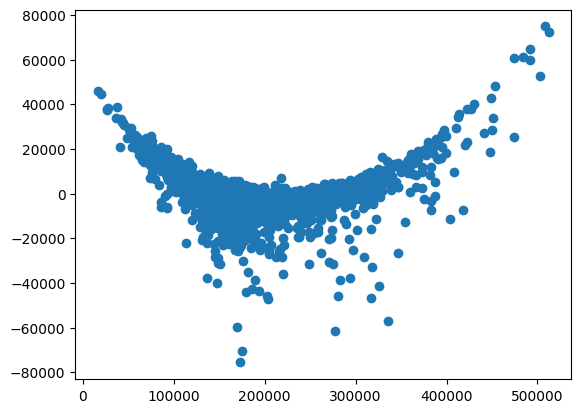

In [ ]:
y = results1['Predicted']
x= results1['Residual']
plt.scatter(y,x)
